# Setup

The following python libraries were used to perform the following analysis.

In [2]:
!pip install davos
import davos #this provides the "smuggle" keyword-- used as a more robust version of "import"

     |████████████████████████████████| 76 kB 2.5 MB/s 


In [3]:
#number crunching
smuggle numpy as np
smuggle pandas as pd
 

#data visualization
smuggle plotly # pip: plotly==4.14.3
smuggle plotly.express as px
import matplotlib.pyplot as plt

 

     |████████████████████████████████| 13.2 MB 2.8 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=9bccfa674f3594e4db4fe69266fe19cbe62bae6ba98bf54c557c394ce3d4766f
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


# Google authentication

As all datasets uploaded in this colab notebook were first uploaded to https://github.com/elisabrosera/storytelling-with-data/tree/master/data-stories/VT-DoH, we will not need the code used for Google authentication.

# Project team

The team members for this project are Elisa Brosera' and Annemarija Apine.

The following were our roles in the project:<br> 
Annemarija Apine proposed the topic of reasearch and found the majority of the datasets from CDC(Centers for Disease Control and Prevention). Then we proceeded together merging and rearranging the datasets in Excel and in Colab; we analysed and interpreted the quatitative results derived together. Annemarija and I worked on the script of the story individually but revised it together. Eventually, Annemarija created the Powerpoint presentation, I created this notebook based on the previouly created python file containing the code of our analysis. Finally, we recorded the story.

# Background and overview

Looking at Vermount department of health website, we noticed that skin cencer is a very relevant issue, which has been partially adressed in recent years. We were curious to know why Vermont has such a high melanoma incidence rate despite its geographic location and what are some possible preventative methods that would work depending on the causes.<br>
To conduct this analysis we refer to CDC cancer rate data set, which is  available here: https://gis.cdc.gov/Cancer/USCS/?CDC_AA_refVal=https%3A%2F%2Fwww.cdc.gov%2Fcancer%2Fdataviz%2Findex.htm#/AtAGlance/

# Approach
We'll be comparing the melanoma incidence rate with the UV intensity rate in two colour-coded geographic maps of the US. Due to issues of finding a compatible state geojson file or county-specific cancer incidence rates, for the purpose of colouring the map, we applied the state-wide cancer rates to all counties within each state. Furthermore, we'll explore the possible explanations such as the percentage of adolescents and youths reporting sunburn (calculated as unweighted means from county data in Excel) and compare them to the national average and recommended rate in a bar graph.
# Quick summary
Despite low UV intensity, Vermont reported a relatively high incidence of melanomas, as well as high rates of youth and adolescent sunburns. It is possible that it's due to the popularity of winter sports since snow can reflect UV rays, as well as insufficient health policies.



# Data

Briefly describe your dataset(s), including links to original sources.  Provide any relevant background information specific to your data sources.

In [4]:
# importing data
uv=pd.read_excel('https://github.com/elisabrosera/storytelling-with-data/raw/master/data-stories/VT-DoH/uv-county.xlsx') 
#uv levels per county per state in USA, mean for the last 10 years
uv.head()

melanoma=pd.read_excel('https://github.com/elisabrosera/storytelling-with-data/raw/master/data-stories/VT-DoH/cancer_rate.xlsx') 
#age-adjusted melanoma incidence rate per county(2014-2018) 
melanoma.head()

cancer=pd.read_excel('https://github.com/elisabrosera/storytelling-with-data/raw/master/data-stories/VT-DoH/USCSOverviewMap.xlsx')
#initial dataset on age-adjusted melanoma incidence rate per state(2014-2018) not eventually used in our analysis
cancer.head()

sunburn=pd.read_excel('https://github.com/elisabrosera/storytelling-with-data/raw/master/data-stories/VT-DoH/Cancer.xlsx', 'Sheet1')
#2015 data on the percentages of adolescents(9-12 grade) and youth(6-8 grade) having had at least one sunburn in the last 12 months in Vermont 
sunburn.head()


,ReportingGroupCode,Topic,Indicator,Year(s),Geography Type,Geography Name,Indicator Value,Statistically Compared to State,Unnamed: 8
0,HV2020,Cancer,Percent of adolescents in grades 9-12 who repo...,2015,County,Addison,73,Worse,50001
1,HV2020,Cancer,Percent of adolescents in grades 9-12 who repo...,2015,County,Bennington,69,Worse,50003
2,HV2020,Cancer,Percent of adolescents in grades 9-12 who repo...,2015,County,Caledonia,60,Better,50005
3,HV2020,Cancer,Percent of adolescents in grades 9-12 who repo...,2015,County,Chittenden,63,Better,50007
4,HV2020,Cancer,Percent of adolescents in grades 9-12 who repo...,2015,County,Essex,59,Same,50009


# Analysis

Briefly describe each step of your analysis, followed by the code implementing that part of the analysis and/or producing the relevant figures.  (Copy this text block and the following code block as many times as are needed.)

In [5]:
#setup for the map plotting
geojson_file = 'https://raw.githubusercontent.com/ContextLab/storytelling-with-data/master/data-stories/demo/geojson-counties-fips.json'
from urllib.request import urlopen
import json
with urlopen(geojson_file) as response:
    counties = json.load(response)

In [ ]:
#in the below map uv levels per county in USA displayed 
#missing data appears as grey areas of the map
fig = px.choropleth(uv, geojson=counties, locations='COUNTY_FIPS', color='UV_ Wh/m²',
                    color_continuous_scale='RdBu_r', scope='usa',
                    labels={'Indicator Value': 'Insured (%)'})

fig.update_geos(fitbounds="locations", visible=True)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#in the below map age-adjusted rate of new melanoma cancers(2014-2018) per county in USA 
fig = px.choropleth(melanoma, geojson=counties, locations='COUNTY_FIPS', color='Age-adjusted rate',
                    color_continuous_scale='RdBu_r', scope='usa')

fig.update_geos(fitbounds="locations", visible=True)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

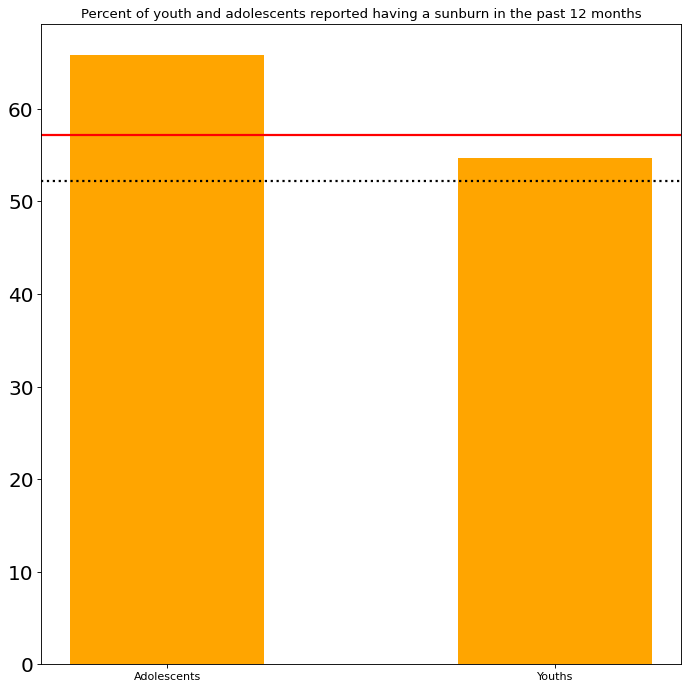

In [ ]:
#bar plot showing the % of youth and adolescents having reported a sunburn in the past 12 months(2015)
#for simplicity we did compute the average percentage among counties in Vermont in Excel and here below inserted the results

#Adolescents 9-12 65.86%
#Youths 6-8 54.71%
#Adolescents (countrywide) 57.2%
#Health people 2030 goals 52.2%

fig = plt.figure(figsize=(8, 8), dpi=80)
ax = fig.add_axes([0,0,1,1])
category = ['Adolescents', 'Youths']
percentage = [65.86,54.71]
plt.axhline(57.2, color='red', lw=2)
plt.axhline(52.2, color='black', ls='dotted', lw=2)
ax.bar(category,percentage, width=0.5, color='orange')
plt.yticks(fontsize=18)
ax.set_title('Percent of youth and adolescents reported having a sunburn in the past 12 months')
plt.show()

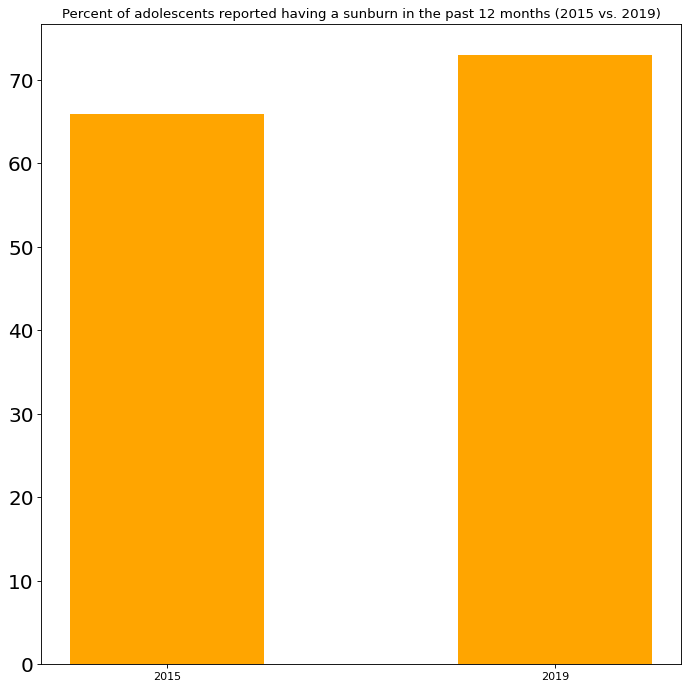

In [6]:
#bar plot showing the % of  adolescents having reported a sunburn in the past 12 months(2015 vs. 2019)
#Adolescents 2015 65.86%
#Adolescents 2019 73%
fig = plt.figure(figsize=(8, 8), dpi=80)
ax = fig.add_axes([0,0,1,1])
category = ['2015', '2019']
percentage = [65.86,73]
ax.bar(category,percentage, width=0.5, color='orange')
plt.yticks(fontsize=18)
ax.set_title('Percent of adolescents reported having a sunburn in the past 12 months (2015 vs. 2019)')
plt.show()

# Interpretations and conclusions

It appears that UV intensity does not explain the melanoma rate in Vermont; rather it is likely that a cause is the lack of preventative measures against sun damage, indicated by the alarming percentage of teenagers with recorded sunburns. However, more recent data would be needed to see if some existing policies have been effective.

# Future directions

Is there a decreasing trend in sunburn rates after new educational policies have been implemented? Is there a correlation between sunburn rates and melanomas? How soon do effects from policies start to materialise? Do the same trends hold true for other states?
These are some interesting further questions that could be adressed. 
It is worth noticing that we didn't dig into them because of lack of data available.